In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [70]:
teams = pd.read_csv('mlb_teams.csv')

dp = pd.read_csv('stats_and_pay_pitchers.csv')
db = pd.read_csv('stats_and_pay_batters.csv')
print(len(dp), len(db) )

3546 3246


In [71]:
'1B_y' in db.columns

False

---
# Pitching

In [72]:
# what initially seem like the stats that influcence pay the most for pitchers?
pitch_corr_df = dp.corr(numeric_only=True) # get the pearson-r correlation matrix

ppay_corr_sort = np.abs(pitch_corr_df['log_pay_adj']).sort_values()[::-1].dropna() # sort by the columns that correlate the most with pay
nvals_in_cols = np.array([np.sum(~np.isnan(dp[col].values)) for col in ppay_corr_sort.index])

In [73]:
# how many nans are there in these columns
for col in list(ppay_corr_sort[np.logical_and(nvals_in_cols>100, ppay_corr_sort<1.0)].iloc[:50].index):
    print(col,np.isnan(dp[col].values).sum())

log_pay 0
pay 0
pay_adj 0
p_+WPA 1021
Start-IP 2252
age 0
p_SO 1021
p_-WPA 1021
p_RAR 1021
p_WAR 1021
IP 1021
p_Age 1021
p_Strikes 1021
Starting 2252
p_Pitches 1021
W 1021
TBF 1021
RA9-WAR 1021
p_Balls 1021
p_Events 1021
p_GB 1021
p_FB 1021
p_H 1021
p_LD 1021
RS 1021
p_HardHit 1021
GS 1021
p_IFH 1021
p_Barrels 1021
p_IFFB 1021
p_BB 1021
p_R 1021
p_HR 1021
ER 1021
L 1021
inLI 1021
Relieving 1649
p_BU 1021
p_pLI 1021
botERA 2911
botOvr 2911
botxRV100 2911
Location+ 2911
kwERA 1021
xFIP 1021
Pitching+ 2911
p_REW 1021
p_WPA 1021
p_HBP 1021
xFIP- 1021


In [74]:
dp[np.isnan(dp['p_+WPA'].values)]

,year,team,first_name,last_name,pay,age,position,status,Season,team_abbrev,...,Pit+ FC,Stf+ FS,Loc+ FS,Pit+ FS,Stuff+,Location+,Pitching+,Stf+ FO,Loc+ FO,Pit+ FO
7,2016,Arizona Diamondbacks,Jake,Barrett,476956.0,24,RP,NaN,2016,ARI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2016,Arizona Diamondbacks,Enrique,Burgos,304655.0,25,RP,NaN,2016,ARI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2016,Arizona Diamondbacks,Braden,Shipley,194110.0,24,SP,Pre-Arb,2016,ARI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2016,Arizona Diamondbacks,Edwin,Escobar,177472.0,24,RP,NaN,2016,ARI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,2016,Arizona Diamondbacks,Steve,Hathaway,149742.0,25,P,NaN,2016,ARI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,2022,Texas Rangers,Yerry,Rodriguez,15384.0,24,SP,Pre-Arb,2022,TEX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3520,2022,Toronto Blue Jays,Jose,Berrios,10714285.0,28,SP,Vet,2022,TOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3535,2022,Washington Nationals,Anibal,Sanchez,2000000.0,38,SP,Vet,2022,WAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3540,2022,Washington Nationals,Erasmo,Ramirez,646128.0,32,RP,Vet,2022,WAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# let's try some PCA with all columns except pay

pca_p = PCA(n_components=15)
columns_mask = np.logical_and.reduce([dp.columns!='pay',dp.columns!='log_pay',
                                      dp.columns!='pay_adj', dp.columns!='log_pay_adj',
                                      dp.columns!='adj', dp.columns!='year',
                                      dp.columns!='Season',dp.columns!='Season_prev',
                                      dp.columns!='fgid',
                                      np.logical_or(dp.dtypes==np.float64,dp.dtypes==int)])



dp_pca = dp[dp.columns[columns_mask]].copy()
for col in dp_pca.columns:
    dp_pca[col] = dp_pca[col].fillna(np.nanmean(dp_pca[col].values)) # fill the nans with means
dp_pca = dp_pca.fillna(-999) # fill remaining nans
pca_p.fit(dp_pca.values)

len(np.max(pca_p.components_, axis=0)), len(dp_pca.columns)

/tmp/ipykernel_104/1393229968.py:15: RuntimeWarning: Mean of empty slice
  dp_pca[col] = dp_pca[col].fillna(np.nanmean(dp_pca[col].values)) # fill the nans with means


(392, 392)

In [76]:
# what is the max weight of WPA?
np.max(pca_p.components_, axis=0)[dp_pca.columns=='p_WPA']

array([0.0119541])

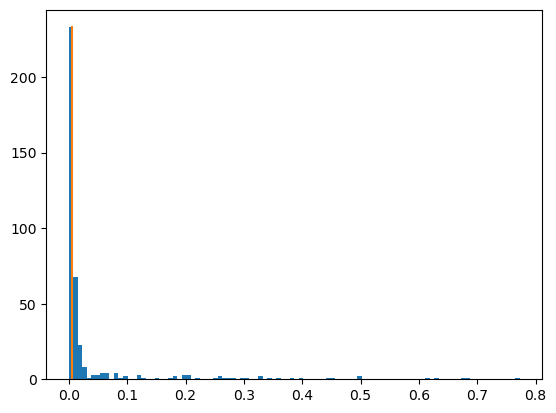

In [77]:
# what should the threshold be to find the most important columns?
thresh_p = 0.005
b = plt.hist(np.max(pca_p.components_, axis=0), bins=100)
plt.plot(np.ones(2)*thresh_p, [0,max(b[0])])

In [78]:
# find the cols for which the pca has put the most weight on
dp_pca.columns[np.max(pca_p.components_, axis=0)>thresh_p], len(dp_pca.columns[np.max(pca_p.components_, axis=0)>thresh_p])

(Index(['age', 'p_Age', 'W', 'L', 'p_WAR', 'ERA', 'p_G', 'GS', 'SV', 'BS',
        ...
        'Stf+ SL', 'Loc+ SL', 'Pit+ SL', 'Stf+ FC', 'Loc+ FC', 'Pit+ FC',
        'Stf+ FS', 'Stuff+', 'Location+', 'Pitching+'],
       dtype='object', length=197),
 197)

In [79]:
# we've saving this cut table
dp_topcol = dp[['fgid','year','pay_adj','log_pay_adj']+list(dp_pca.columns[np.max(pca_p.components_, axis=0)>thresh_p])].copy()
dp_topcol.to_csv('stats_and_pay_pitchers_topcols.csv', index=False)

---
# Batting

In [80]:
# what initially seem like the stats that influcence pay the most for pitchers?
bat_corr_df = db.corr(numeric_only=True) # get the pearson-r correlation matrix

bpay_corr_sort = np.abs(bat_corr_df['log_pay_adj']).sort_values()[::-1].dropna() # sort by the columns that correlate the most with pay
nvals_in_cols = np.array([np.sum(~np.isnan(db[col].values)) for col in bpay_corr_sort.index])

In [81]:
# how many nans are there in these columns
for col in list(bpay_corr_sort[np.logical_and(nvals_in_cols>100, bpay_corr_sort<1.0)].iloc[:50].index):
    print(col,np.isnan(db[col].values).sum())

log_pay 0
pay_adj 0
pay 0
b_HardHit 707
b_+WPA 707
b_Balls 707
wRC 707
PA 707
Rep 707
b_Pitches 707
b_Events 707
RBI 707
b_H 707
b_FB 707
AB 707
b_R 707
b_Strikes 707
b_-WPA 707
b_LD 707
b_BB 707
1B 707
b_GB 707
2B 707
b_G 707
GDP 707
age 0
b_HR 707
b_Barrels 707
L-WAR 707
b_WAR 707
b_RAR 707
b_SO 707
b_Age 707
SF 707
b_IFFB 707
Lg 707
b_IFH 707
b_IBB 707
wRAA 707
b_RE24 707
b_REW 707
b_wFB 708
b_WPA/LI 707
b_maxEV 711
Bat 707
OPS 707
BB/K 707
wRC+ 707
wOBA 707
SLG+ 708


In [82]:
# let's try some PCA with all columns except pay
pca_b = PCA(n_components=15)
columns_mask = np.logical_and.reduce([db.columns!='pay',db.columns!='log_pay',
                                      db.columns!='pay_adj', db.columns!='log_pay_adj',
                                      db.columns!='adj', db.columns!='year',
                                      db.columns!='Season',db.columns!='Season_prev',
                                      db.columns!='fgid',
                                      np.logical_or(db.dtypes==np.float64,db.dtypes==int)])

db_pca = db[db.columns[columns_mask]].copy()
for col in db_pca.columns:
    db_pca[col].fillna(np.nanmean(db_pca[col].values),inplace=True) # fill the nans with means
db_pca = db_pca.fillna(-999) # fill remaining nans
pca_b.fit(db_pca.values)

len(np.max(pca_b.components_, axis=0)), len(db_pca.columns)

/tmp/ipykernel_104/636723824.py:12: RuntimeWarning: Mean of empty slice
  db_pca[col].fillna(np.nanmean(db_pca[col].values),inplace=True) # fill the nans with means


(319, 319)

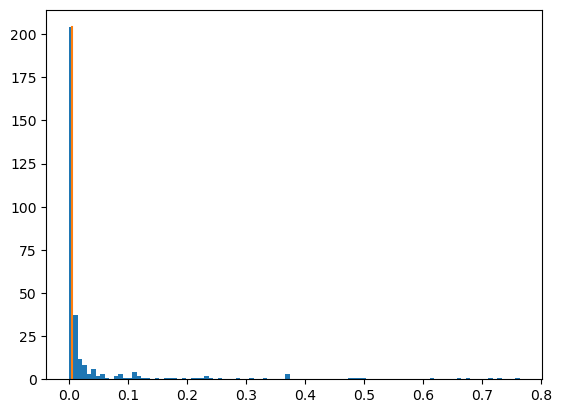

In [83]:
# what should the threshold be to find the most important columns?
thresh_b = 0.005
b = plt.hist(np.max(pca_b.components_, axis=0), bins=100)
plt.plot(np.ones(2)*thresh_b , [0,max(b[0])])

In [84]:
# find the cols for which the pca has put the most weight on
db_pca.columns[np.max(pca_b.components_, axis=0)>thresh_b ], len(db_pca.columns[np.max(pca_b.components_, axis=0)>thresh_b ])

(Index(['age', 'b_Age', 'b_G', 'AB', 'PA', 'b_H', '1B', '2B', '3B', 'b_HR',
        ...
        'b_Soft%+', 'b_Med%+', 'b_Hard%+', 'b_EV', 'b_LA', 'b_Barrels',
        'b_maxEV', 'b_HardHit', 'b_Events', 'L-WAR'],
       dtype='object', length=136),
 136)

In [85]:
'1B_y' in db_pca.columns

False

In [86]:
# we've saving this cut table
db_topcol = db[['fgid','year','pay_adj','log_pay_adj']+list(db_pca.columns[np.max(pca_b.components_, axis=0)>thresh_b ])].copy()
db_topcol.to_csv('stats_and_pay_batters_topcols.csv', index=False)

---

In [87]:
# let's try some PCA with all columns except pay

# get pitchign dat
columns_mask = np.logical_and.reduce([dp.columns!='pay',dp.columns!='log_pay',
                                      dp.columns!='pay_adj', dp.columns!='log_pay_adj',
                                      dp.columns!='adj', dp.columns!='year', 
                                      dp.columns!='Season',dp.columns!='Season_prev',
                                      dp.columns!='fgid',
                                      np.logical_or(dp.dtypes==np.float64,dp.dtypes==int)])

dp_pca = dp[dp.columns[columns_mask]].copy()
for col in dp_pca.columns:
    dp_pca[col] = dp_pca[col].fillna(np.nanmean(dp_pca[col].values)) # fill the nans with means
dp_pca = dp_pca.fillna(0) # fill remaining nans


# get batting dat
columns_mask = np.logical_and.reduce([db.columns!='pay',db.columns!='log_pay',
                                      db.columns!='pay_adj', db.columns!='log_pay_adj',
                                      db.columns!='adj', db.columns!='year',
                                      db.columns!='Season',db.columns!='Season_prev',
                                      db.columns!='fgid',
                                      np.logical_or(db.dtypes==np.float64,db.dtypes==int)])

db_pca = db[db.columns[columns_mask]].copy()
for col in db_pca.columns:
    db_pca[col].fillna(np.nanmean(db_pca[col].values),inplace=True) # fill the nans with means
db_pca = db_pca.fillna(0) # fill remaining nans


len(dp_pca.columns),len(db_pca.columns)

/tmp/ipykernel_104/2651873030.py:13: RuntimeWarning: Mean of empty slice
  dp_pca[col] = dp_pca[col].fillna(np.nanmean(dp_pca[col].values)) # fill the nans with means
/tmp/ipykernel_104/2651873030.py:27: RuntimeWarning: Mean of empty slice
  db_pca[col].fillna(np.nanmean(db_pca[col].values),inplace=True) # fill the nans with means


(392, 319)

In [88]:
# prepare for merge
db_prep = pd.concat([db[['fgid','pay_adj','log_pay_adj','year']], db_pca],axis=1)
dp_prep = pd.concat([dp[['fgid','pay_adj','log_pay_adj','year']], dp_pca],axis=1)

# merge!
df = pd.merge(dp_prep,db_prep, on=['fgid','pay_adj','log_pay_adj','year'],how='outer')
df = df[df['pay_adj']>0]
print(df.shape)

pca = PCA(n_components=200)

colm = np.logical_and.reduce([df.columns!=col for col in ['fgid','pay_adj','log_pay_adj','year']])
df_pca = df[df.columns[colm]].copy()

df_pca = df_pca.fillna(0)
pca.fit(df_pca.values)

print(pca.components_.shape)

(6770, 715)
(200, 711)


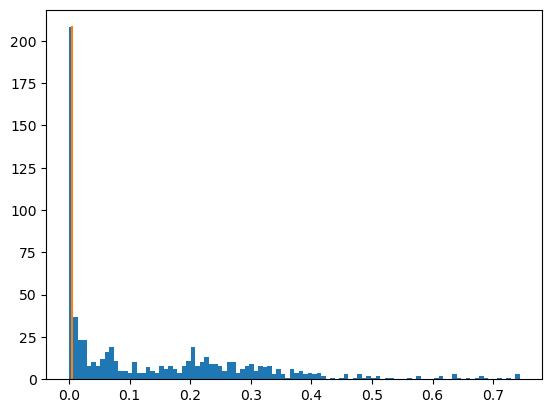

In [89]:
thresh = 0.005
b = plt.hist(np.max(pca.components_, axis=0), bins=100)
plt.plot(np.ones(2)*thresh , [0,max(b[0])])

In [90]:
# perhaps we save the pca 
df_pca_comp = pd.DataFrame(data = pca.components_.T,  
                  columns = ['pca_c%i'%i for i in range(pca.components_.shape[0])]) 
df_out = pd.concat([df[['fgid','pay_adj','log_pay_adj','year']], df_pca_comp], axis=1)
df_out.to_csv('stats_and_pay_batters_pca.csv', index=False)